# Paris Rental Market Analysis

## Introduction
This notebook focuses on an in-depth analysis of the Paris rental market, with a particular emphasis on the impact of the Olympic Games. We'll explore how various factors influence rental prices, availability, and demand in Paris.

## Objectives
1. Analyze historical trends in the Paris rental market
2. Identify factors that significantly influence rental prices and availability
3. Assess the impact of past major events on the rental market
4. Predict potential changes during the Olympic Games period
5. Evaluate Airbnb's capacity to handle increased demand

## Contents
1. Historical Trend Analysis
2. Price Determinants Analysis
3. Seasonality and Event Impact Study
4. Olympic Games Period Prediction
5. Airbnb Capacity Assessment
6. Recommendations for Paris

We'll begin by loading our preprocessed Paris dataset and any additional relevant data for our analysis.

In [7]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
# Load the cleaned and merged dataset
data = pd.read_csv('raw_data/merged/merged_data.csv')
data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,listing_id,date
0,371299.0,Marais Rue des Archives refait à neuf février ...,1870265.0,Thomas,NaN,Hôtel-de-Ville,48.85751,2.35511,Entire home/apt,185.0,3.0,601.0,2024-09-06,3.97,3.0,307.0,54.0,7510300547558,NaN,NaN
1,371862.0,loft in Paris (Belleville),1872631.0,Veronique,NaN,Entrepôt,48.87151,2.37219,Entire home/apt,250.0,4.0,50.0,2023-08-14,0.34,1.0,9.0,0.0,7511000320406,NaN,NaN
2,372879.0,Appartement complet au centre de Paris.,1876396.0,Samuel,NaN,Gobelins,48.83593,2.35108,Entire home/apt,85.0,30.0,171.0,2024-08-15,2.01,3.0,151.0,1.0,"Available with a mobility lease only (""bail mo...",NaN,NaN
3,375434.0,"Luxurious Art & Design Flat, 180m2, Champs Ely...",683140.0,Oscar,NaN,Élysée,48.86680,2.30972,Entire home/apt,NaN,3.0,22.0,2023-07-15,0.15,1.0,0.0,0.0,7510806561916,NaN,NaN
4,378897.0,Little flat near Montmartre,1902818.0,Lorraine,NaN,Opéra,48.88285,2.33462,Entire home/apt,110.0,3.0,28.0,2024-07-30,0.19,1.0,6.0,2.0,7511805895013,NaN,NaN


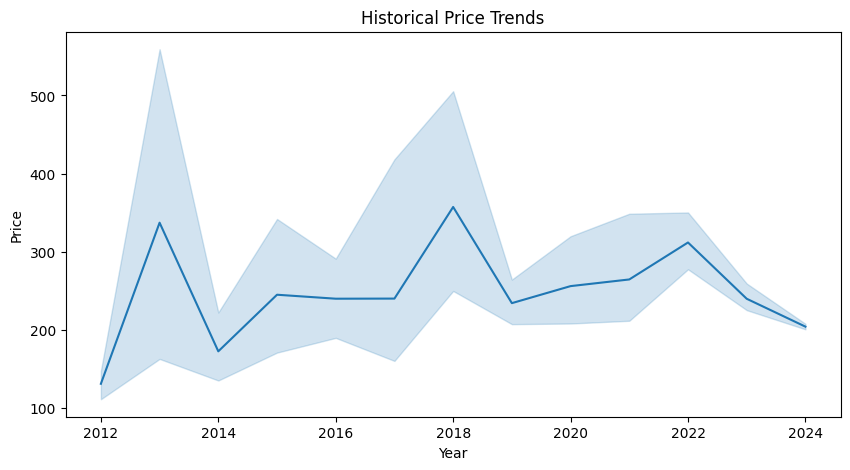

In [30]:
# Historical Trend Analysis
data['last_review'] = pd.to_datetime(data['last_review'], errors='coerce')
data['year'] = data['last_review'].dt.year
# Plot price trends over the years
plt.figure(figsize=(10, 5))
sns.lineplot(x='year', y='price', data=data)
plt.title('Historical Price Trends')
plt.xlabel('Year')
plt.ylabel('Price')
plt.show()

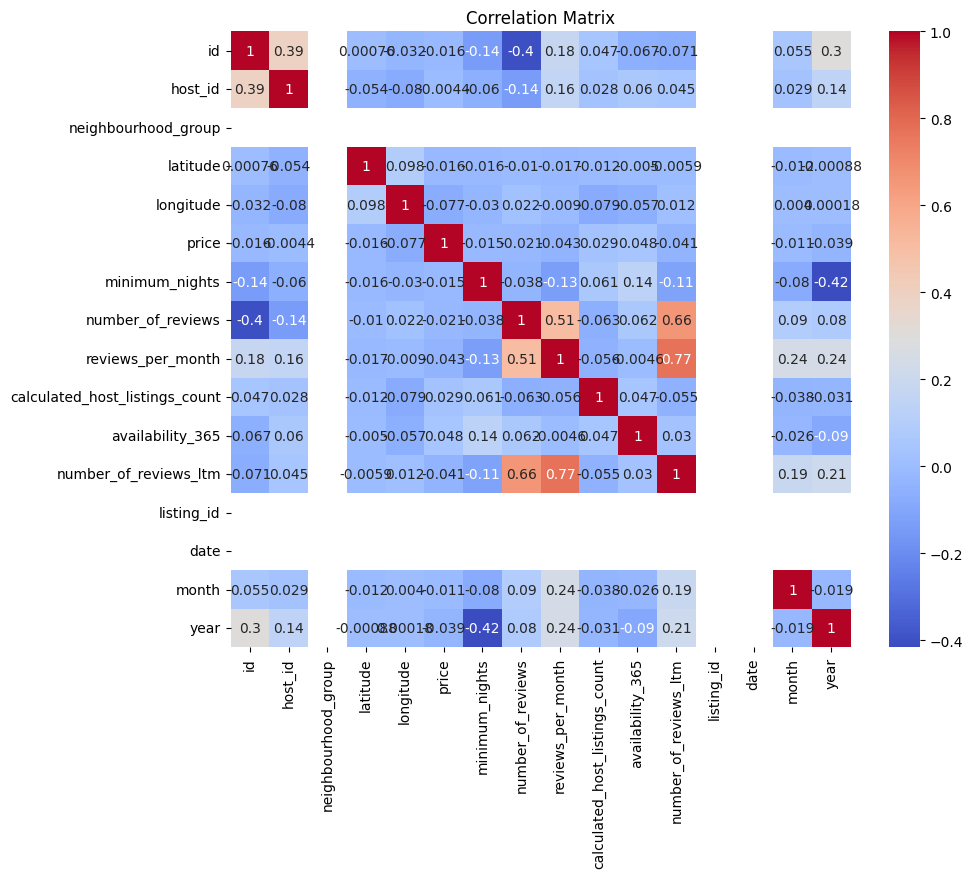

In [31]:
# Price Determinants Analysis
numeric_data = data.select_dtypes(include=[np.number])
corr_matrix = numeric_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

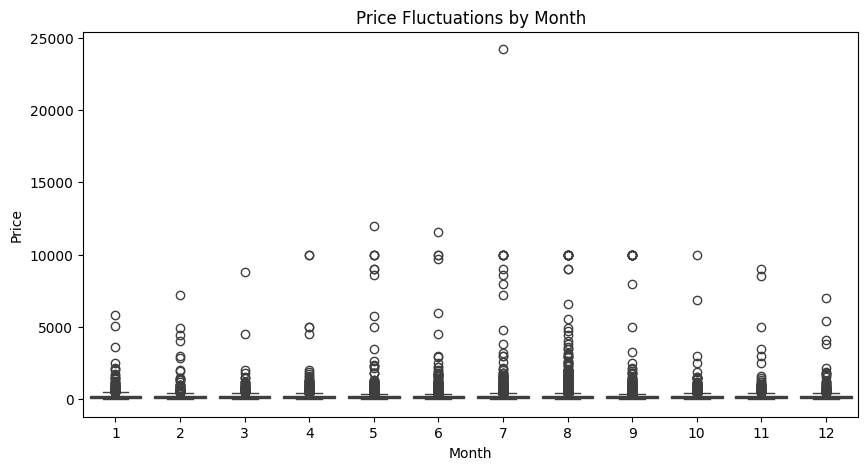

In [32]:
# Seasonality and Event Impact Study
data['month'] = data['last_review'].dt.month
plt.figure(figsize=(10, 5))
sns.boxplot(x='month', y='price', data=data)
plt.title('Price Fluctuations by Month')
plt.xlabel('Month')
plt.ylabel('Price')
plt.show()

In [33]:
# Olympic Games Period Prediction
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

model_data = data[['year', 'month', 'price']].dropna()
X = model_data[['year', 'month']]
y = model_data['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 276662.0565551427


In [36]:
average_availability = data['availability_365'].mean()
print(f'Average Annual Availability: {average_availability} days')

Average Annual Availability: 173.70373908889565 days


In [19]:
# Recommendations for Paris
print("Recommendations:")
print("1. Increase the number of listings in high-demand areas during the Olympics.")
print("2. Adjust pricing strategies based on historical price sensitivity.")
print("3. Enhance customer service and support during peak event periods.")


Recommendations:
1. Increase the number of listings in high-demand areas during the Olympics.
2. Adjust pricing strategies based on historical price sensitivity.
3. Enhance customer service and support during peak event periods.


## See calendar prices using matplotlib

<>:35: SyntaxWarning: invalid escape sequence '\$'
<>:35: SyntaxWarning: invalid escape sequence '\$'
C:\Users\sjokk\AppData\Local\Temp\ipykernel_9300\508075258.py:35: SyntaxWarning: invalid escape sequence '\$'
  filtered_data['price'] = filtered_data['price'].replace('[\$,]', '', regex=True).astype(float)


Plot saved as airbnb_prices_olympic_games.png
Average price: $278.58
Minimum price: $259.40
Maximum price: $296.15


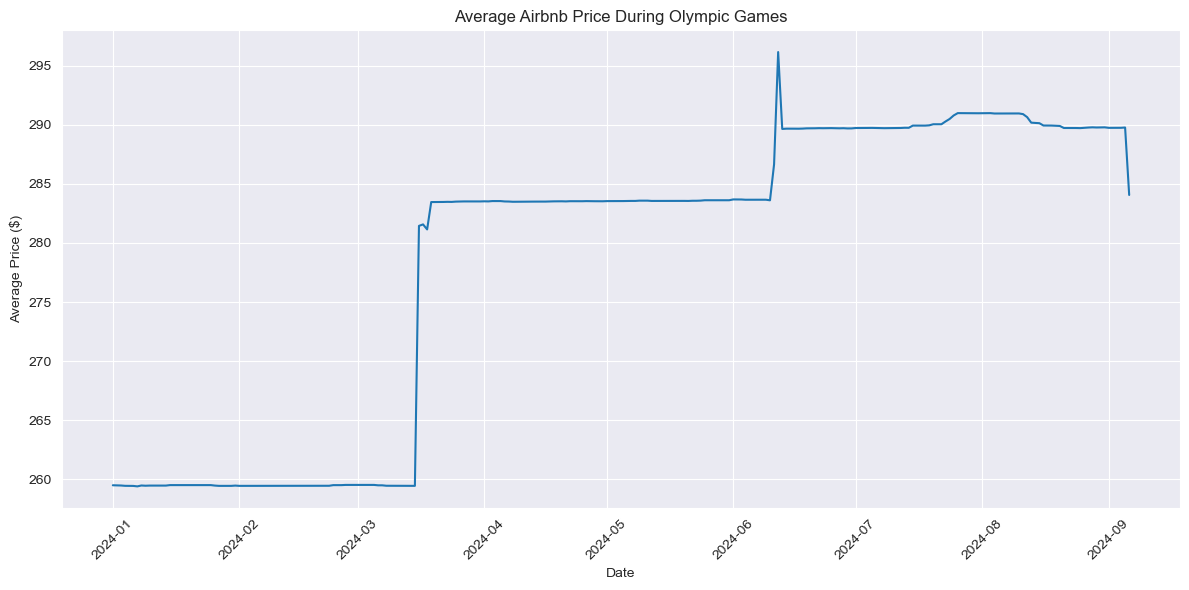

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

def remove_outliers(df, column, multiplier=3.0):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - (multiplier * IQR)
    upper_bound = Q3 + (multiplier * IQR)
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

def visualize_airbnb_prices(file_path, start_date, end_date):
    # Convert date strings to datetime objects
    start_date = pd.to_datetime(start_date)
    end_date = pd.to_datetime(end_date)

    # Initialize an empty DataFrame to store the filtered data
    filtered_data = pd.DataFrame()

    # Read the CSV file in chunks
    chunk_size = 100000  # Adjust this value based on your available memory
    for chunk in pd.read_csv(file_path, chunksize=chunk_size):
        # Convert 'date' column to datetime
        chunk['date'] = pd.to_datetime(chunk['date'])
        
        # Filter the chunk based on the date range
        mask = (chunk['date'] >= start_date) & (chunk['date'] <= end_date)
        filtered_chunk = chunk.loc[mask]
        
        # Append the filtered chunk to our results
        filtered_data = pd.concat([filtered_data, filtered_chunk])

    # Convert price to numeric, removing the dollar sign and commas
    filtered_data['price'] = filtered_data['price'].replace('[\$,]', '', regex=True).astype(float)

    # Remove outliers
    #filtered_data = remove_outliers(filtered_data, 'price', multiplier=100.0)

    # Group by date and calculate the average price
    daily_avg_price = filtered_data.groupby('date')['price'].mean().reset_index()

    # Create the line plot
    plt.figure(figsize=(12, 6))
    plt.plot(daily_avg_price['date'], daily_avg_price['price'])
    plt.title('Average Airbnb Price During Olympic Games')
    plt.xlabel('Date')
    plt.ylabel('Average Price ($)')
    plt.xticks(rotation=45)
    plt.tight_layout()

    # Save the plot as a PNG file
    plt.savefig('airbnb_prices_olympic_games.png')
    print("Plot saved as airbnb_prices_olympic_games.png")

    # Show some basic statistics
    print(f"Average price: ${daily_avg_price['price'].mean():.2f}")
    print(f"Minimum price: ${daily_avg_price['price'].min():.2f}")
    print(f"Maximum price: ${daily_avg_price['price'].max():.2f}")

# Example usage
file_path = 'raw_data/merged/calendar_filtered_plus_plus.csv'
start_date = '2024-01-01'
end_date = '2024-09-06'

visualize_airbnb_prices(file_path, start_date, end_date)

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

def plot_neighborhood_prices(data, title, filename):
    neighborhood_prices = data.groupby('neighbourhood')['price'].mean().sort_values(ascending=False)
    plt.figure(figsize=(12, 6))
    neighborhood_prices.head(20).plot(kind='bar')
    plt.title(title)
    plt.xlabel('Neighborhood')
    plt.ylabel('Average Price ($)')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.savefig(filename)
    plt.close()
    return neighborhood_prices

def analyze_airbnb_data(listings_file, calendar_file, start_date, end_date):
    # Read listings file
    listings = pd.read_csv(listings_file)
    
    # Read calendar file in chunks and filter for the date range
    chunk_size = 1000000  # Adjust based on your available memory
    calendar_data = pd.DataFrame()
    for chunk in pd.read_csv(calendar_file, chunksize=chunk_size):
        chunk['date'] = pd.to_datetime(chunk['date'])
        mask = (chunk['date'] >= start_date) & (chunk['date'] <= end_date)
        calendar_data = pd.concat([calendar_data, chunk[mask]])
    
    # Convert price to numeric, removing the dollar sign and commas
    calendar_data['price'] = calendar_data['price'].replace('[\$,]', '', regex=True).astype(float)
    
    # Merge calendar data with listings
    merged_data = pd.merge(calendar_data, listings[['id', 'neighbourhood', 'distance_to_closest_venue']], 
                           left_on='listing_id', right_on='id')
    
    # Plot neighborhood prices with outliers
    neighborhood_prices_with_outliers = plot_neighborhood_prices(merged_data, 
                                                                 'Average Airbnb Price by Neighborhood (Top 20, With Outliers)',
                                                                 'airbnb_prices_by_neighborhood_with_outliers.png')
    
    # Remove outliers for price and distance
    merged_data_no_outliers = remove_outliers(merged_data, 'price')
    merged_data_no_outliers = remove_outliers(merged_data_no_outliers, 'distance_to_closest_venue')

    # Plot neighborhood prices without outliers
    neighborhood_prices_without_outliers = plot_neighborhood_prices(merged_data_no_outliers, 
                                                                    'Average Airbnb Price by Neighborhood (Top 20, Without Outliers)',
                                                                    'airbnb_prices_by_neighborhood_without_outliers.png')

    # Create scatter plot with outliers
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=merged_data, x='distance_to_closest_venue', y='price', alpha=0.5)
    plt.title('Price vs Distance to Closest Venue (With Outliers)')
    plt.xlabel('Distance to Closest Venue (km)')
    plt.ylabel('Price ($)')
    plt.savefig('price_vs_distance_with_outliers.png')
    plt.close()

    # Create scatter plot without outliers
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=merged_data_no_outliers, x='distance_to_closest_venue', y='price', alpha=0.5)
    plt.title('Price vs Distance to Closest Venue (Without Outliers)')
    plt.xlabel('Distance to Closest Venue (km)')
    plt.ylabel('Price ($)')
    plt.savefig('price_vs_distance_without_outliers.png')
    plt.close()
    
    # Calculate correlation coefficients
    correlation_with_outliers = merged_data['price'].corr(merged_data['distance_to_closest_venue'])
    correlation_without_outliers = merged_data_no_outliers['price'].corr(merged_data_no_outliers['distance_to_closest_venue'])

    print(f"Correlation between price and distance (with outliers): {correlation_with_outliers:.2f}")
    print(f"Correlation between price and distance (without outliers): {correlation_without_outliers:.2f}")
    print(f"Number of data points before removing outliers: {len(merged_data)}")
    print(f"Number of data points after removing outliers: {len(merged_data_no_outliers)}")

    # Compare top 5 neighborhoods before and after outlier removal
    print("\nTop 5 neighborhoods by average price (with outliers):")
    print(neighborhood_prices_with_outliers.head())
    print("\nTop 5 neighborhoods by average price (without outliers):")
    print(neighborhood_prices_without_outliers.head())

listings_file = 'raw_data/merged/summary_venues.csv'
calendar_file = 'raw_data/merged/calendar_filtered.csv'
start_date = '2024-05-01'
end_date = '2024-09-30'

analyze_airbnb_data(listings_file, calendar_file, start_date, end_date)

<>:39: SyntaxWarning: invalid escape sequence '\$'
<>:39: SyntaxWarning: invalid escape sequence '\$'
C:\Users\sjokk\AppData\Local\Temp\ipykernel_13976\3308090736.py:39: SyntaxWarning: invalid escape sequence '\$'
  calendar_data['price'] = calendar_data['price'].replace('[\$,]', '', regex=True).astype(float)
C:\Users\sjokk\AppData\Local\Temp\ipykernel_13976\3308090736.py:33: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(calendar_file, chunksize=chunk_size):
C:\Users\sjokk\AppData\Local\Temp\ipykernel_13976\3308090736.py:33: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(calendar_file, chunksize=chunk_size):
C:\Users\sjokk\AppData\Local\Temp\ipykernel_13976\3308090736.py:33: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(calendar_file, chunksize=chu

Correlation between price and distance (with outliers): -0.01
Correlation between price and distance (without outliers): -0.11
Number of data points before removing outliers: 22333906
Number of data points after removing outliers: 19825064

Top 5 neighborhoods by average price (with outliers):
neighbourhood
Élysée            509.072173
Passy             472.979424
Palais-Bourbon    437.150821
Entrepôt          395.772306
Louvre            387.434119
Name: price, dtype: float64

Top 5 neighborhoods by average price (without outliers):
neighbourhood
Louvre            194.616111
Élysée            191.323977
Luxembourg        189.836900
Palais-Bourbon    186.301903
Hôtel-de-Ville    183.188864
Name: price, dtype: float64


## Calendar data as plotly

In [5]:
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from datetime import datetime

def remove_outliers(df, column, multiplier=3.0):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - (multiplier * IQR)
    upper_bound = Q3 + (multiplier * IQR)
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

def visualize_airbnb_prices(file_path, start_date, end_date):
    # Convert date strings to datetime objects
    start_date = pd.to_datetime(start_date)
    end_date = pd.to_datetime(end_date)

    # Initialize an empty DataFrame to store the filtered data
    filtered_data = pd.DataFrame()

    # Read the CSV file in chunks
    chunk_size = 100000  # Adjust this value based on your available memory
    for chunk in pd.read_csv(file_path, chunksize=chunk_size):
        # Convert 'date' column to datetime
        chunk['date'] = pd.to_datetime(chunk['date'])
        
        # Filter the chunk based on the date range
        mask = (chunk['date'] >= start_date) & (chunk['date'] <= end_date)
        filtered_chunk = chunk.loc[mask]
        
        # Append the filtered chunk to our results
        filtered_data = pd.concat([filtered_data, filtered_chunk])

    # Convert price to numeric, removing the dollar sign and commas
    filtered_data['price'] = filtered_data['price'].replace('[\$,]', '', regex=True).astype(float)

    # Remove outliers (commented out as in your example)
    #filtered_data = remove_outliers(filtered_data, 'price', multiplier=100.0)

    # Group by date and calculate the average price
    daily_avg_price = filtered_data.groupby('date')['price'].mean().reset_index()

    # Create the Plotly figure
    fig = make_subplots(specs=[[{"secondary_y": True}]])

    # Add trace for average price
    fig.add_trace(
        go.Scatter(x=daily_avg_price['date'], y=daily_avg_price['price'], name="Average Price"),
        secondary_y=False,
    )

    # Add trace for number of listings (optional, if you want to show this information)
    daily_listing_count = filtered_data.groupby('date').size().reset_index(name='count')
    fig.add_trace(
        go.Scatter(x=daily_listing_count['date'], y=daily_listing_count['count'], name="Number of Listings"),
        secondary_y=True,
    )

    # Set x-axis title
    fig.update_xaxes(title_text="Date")

    # Set y-axes titles
    fig.update_yaxes(title_text="Average Price ($)", secondary_y=False)
    fig.update_yaxes(title_text="Number of Listings", secondary_y=True)

    # Set title
    fig.update_layout(
        title_text="Average Airbnb Price During Olympic Games",
        hovermode="x unified"
    )

    # Save the plot as an interactive HTML file
    fig.write_html("airbnb_prices_olympic_games.html")
    print("Interactive plot saved as airbnb_prices_olympic_games.html")

    # Show some basic statistics
    print(f"Average price: ${daily_avg_price['price'].mean():.2f}")
    print(f"Minimum price: ${daily_avg_price['price'].min():.2f}")
    print(f"Maximum price: ${daily_avg_price['price'].max():.2f}")

# Example usage
file_path = 'raw_data/merged/calendar_filtered_plus_plus.csv'
start_date = '2024-01-01'
end_date = '2024-09-06'

visualize_airbnb_prices(file_path, start_date, end_date)

<>:36: SyntaxWarning: invalid escape sequence '\$'
<>:36: SyntaxWarning: invalid escape sequence '\$'
C:\Users\sjokk\AppData\Local\Temp\ipykernel_9300\2948601258.py:36: SyntaxWarning: invalid escape sequence '\$'
  filtered_data['price'] = filtered_data['price'].replace('[\$,]', '', regex=True).astype(float)


Interactive plot saved as airbnb_prices_olympic_games.html
Average price: $278.58
Minimum price: $259.40
Maximum price: $296.15


<>:35: SyntaxWarning:

invalid escape sequence '\$'

<>:35: SyntaxWarning:

invalid escape sequence '\$'

C:\Users\sjokk\AppData\Local\Temp\ipykernel_9300\4079592687.py:35: SyntaxWarning:

invalid escape sequence '\$'



Plot saved as airbnb_booked_prices_olympic_games.png
Average price: $337.68
Minimum price: $304.22
Maximum price: $375.22


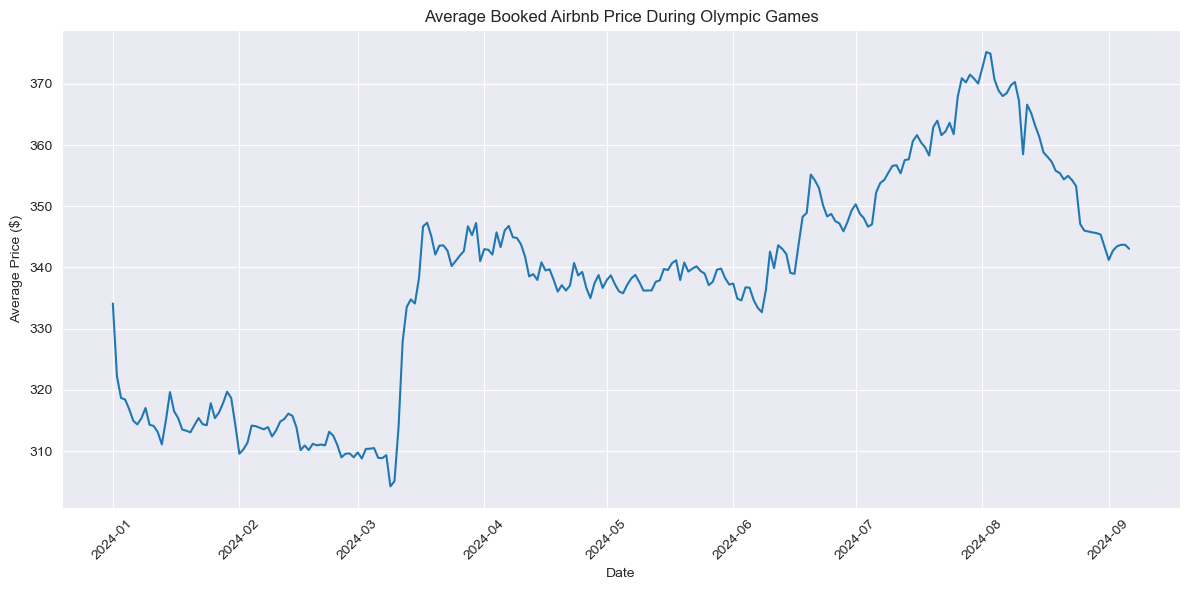

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

def remove_outliers(df, column, multiplier=3.0):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - (multiplier * IQR)
    upper_bound = Q3 + (multiplier * IQR)
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

def visualize_airbnb_prices(file_path, start_date, end_date):
    # Convert date strings to datetime objects
    start_date = pd.to_datetime(start_date)
    end_date = pd.to_datetime(end_date)
    
    # Initialize an empty DataFrame to store the filtered data
    filtered_data = pd.DataFrame()
    
    # Read the CSV file in chunks
    chunk_size = 100000  # Adjust this value based on your available memory
    for chunk in pd.read_csv(file_path, chunksize=chunk_size):
        # Convert 'date' column to datetime
        chunk['date'] = pd.to_datetime(chunk['date'])
        
        # Filter the chunk based on the date range and availability
        mask = (chunk['date'] >= start_date) & (chunk['date'] <= end_date) & (chunk['available'] == 't')
        filtered_chunk = chunk.loc[mask]
        
        # Append the filtered chunk to our results
        filtered_data = pd.concat([filtered_data, filtered_chunk])
    
    # Convert price to numeric, removing the dollar sign and commas
    filtered_data['price'] = filtered_data['price'].replace('[\$,]', '', regex=True).astype(float)
    
    # Remove outliers
    #filtered_data = remove_outliers(filtered_data, 'price', multiplier=100.0)
    
    # Group by date and calculate the average price
    daily_avg_price = filtered_data.groupby('date')['price'].mean().reset_index()
    
    # Create the line plot
    plt.figure(figsize=(12, 6))
    plt.plot(daily_avg_price['date'], daily_avg_price['price'])
    plt.title('Average Booked Airbnb Price During Olympic Games')
    plt.xlabel('Date')
    plt.ylabel('Average Price ($)')
    plt.xticks(rotation=45)
    plt.tight_layout()
    
    # Save the plot as a PNG file
    plt.savefig('airbnb_not_booked_prices_olympic_games.png')
    print("Plot saved as airbnb_booked_prices_olympic_games.png")
    
    # Show some basic statistics
    print(f"Average price: ${daily_avg_price['price'].mean():.2f}")
    print(f"Minimum price: ${daily_avg_price['price'].min():.2f}")
    print(f"Maximum price: ${daily_avg_price['price'].max():.2f}")

# Example usage
file_path = 'raw_data/merged/calendar_filtered_plus_plus.csv'
start_date = '2024-01-01'
end_date = '2024-09-06'

visualize_airbnb_prices(file_path, start_date, end_date)